In [375]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
!pip install imblearn
import re 

In [376]:
num = pd.read_csv('numerical_df.csv',index_col=0)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [377]:
num.shape

(9134, 8)

In [378]:
cat = pd.read_csv('categoricals.csv',index_col=0)
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date,month_effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24,2011,2
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31,2011,1
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19,2011,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20,2011,1
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03,2011,2


In [379]:
data = pd.concat([num, cat], axis=1)
data
                              
                

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer,state,...,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date,month_effective_to_date
0,2763.519279,56274,69,32,5,0,1,384.811147,BU79786,Washington,...,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24,2011,2
1,6979.535903,0,94,13,42,0,8,1131.464935,QZ44356,Arizona,...,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31,2011,1
2,12887.431650,48767,108,18,38,0,2,566.472247,AI49188,Nevada,...,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19,2011,2
3,7645.861827,0,106,18,65,0,7,529.881344,WW63253,California,...,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20,2011,1
4,2813.692575,43836,73,12,44,0,1,138.130879,HB64268,Washington,...,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,LA72316,California,...,Urban,Married,Personal Auto,Personal L1,Web,Four-Door Car,Medsize,2011-02-10,2011,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,PK87824,California,...,Suburban,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,Medsize,2011-02-12,2011,2
9131,8163.890428,0,85,9,37,3,2,790.784983,TD14365,California,...,Suburban,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,Medsize,2011-02-06,2011,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,UP19263,California,...,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car,Large,2011-02-03,2011,2


In [380]:
#1. We will start with removing outliers. So far, we have discussed different methods to remove outliers.
#Use the one you feel more comfortable with, define a function for that. 
#Use the function to remove the outliers and apply it to the dataframe.

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


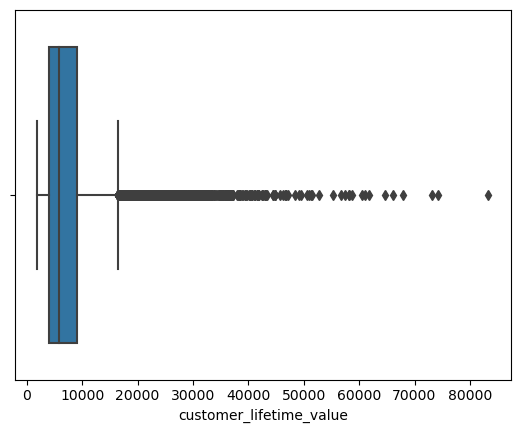

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


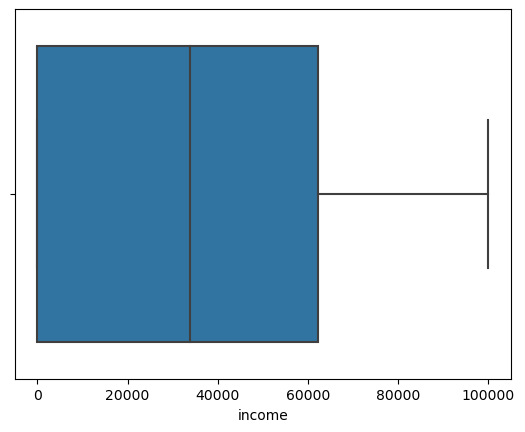

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


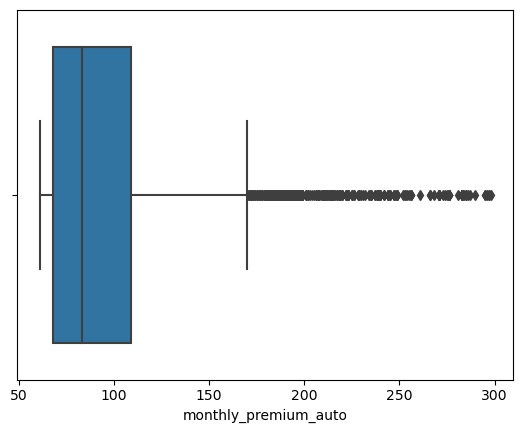

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


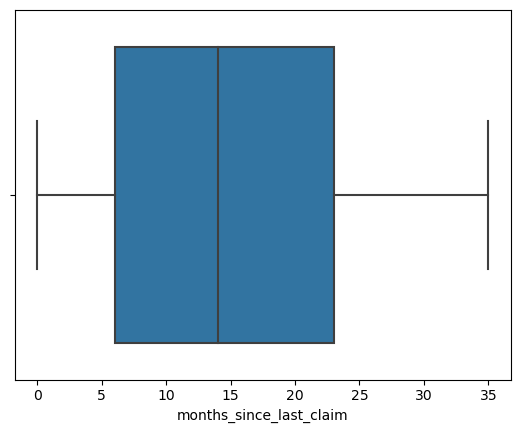

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


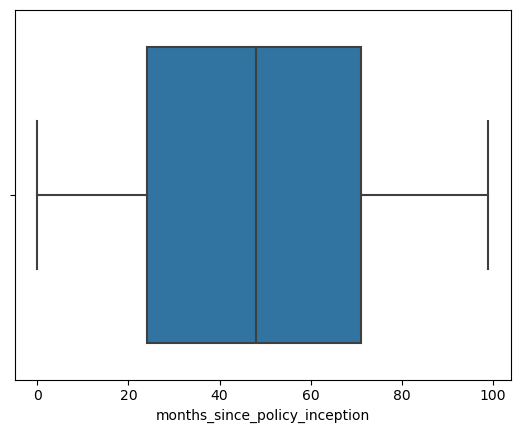

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


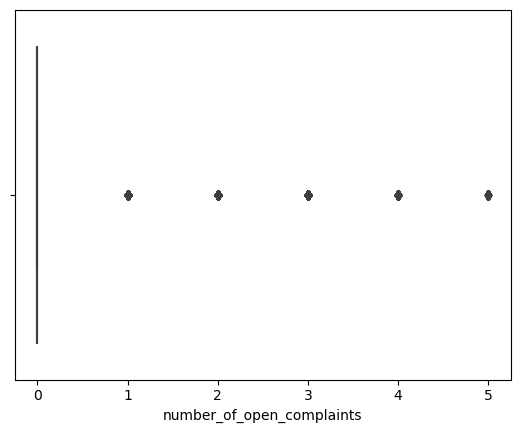

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


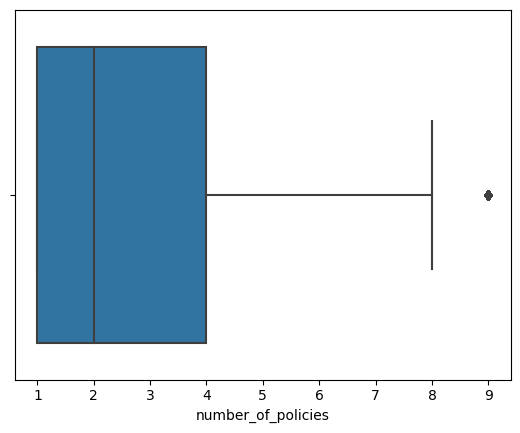

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


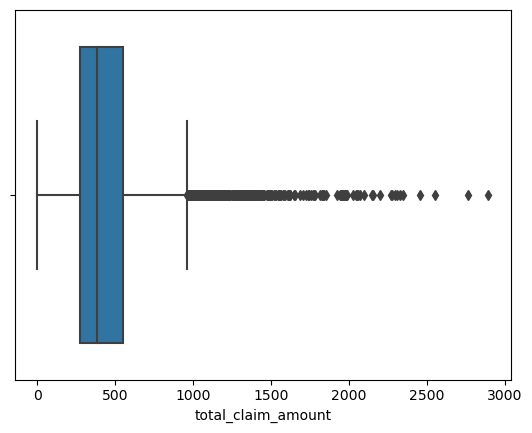

KeyError: 'customer'

In [381]:
for column in data.columns:
    sns.boxplot(num[column],data=num)
    plt.show()

In [ ]:
# def clean_outliers(data): 
   # iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25) 
   #  upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr  
   #  lower_limit = np.percentile(data['total_claim_amount'],25) - 1.5*iqr  
   #  data=data[data['total_claim_amount'] < upper_limit]
   #  data[data['total_claim_amount'] > lower_limit]

   #  iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25) 
   #  upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr  
   #  lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr  
   #  data=data[data['customer_lifetime_value'] < upper_limit]
   #  data[data['customer_lifetime_value'] > lower_limit]

    # iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) 
   #  upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr  
   #  lower_limit = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr  
   #  data=data[data['monthly_premium_auto'] < upper_limit]
   #  data[data['monthly_premium_auto'] > lower_limit]

   #  return(data)

In [ ]:
# clean_outliers(data)

In [ ]:
#num = clean_outliers(num)

In [ ]:
def clean_outliers2(num): 
    for col in num.columns:
        iqr = np.percentile(num[col],75) - np.percentile(num[col],25) 
        upper_limit = np.percentile(num[col],75) + 1.5*iqr  
        lower_limit = np.percentile(num[col],25) - 1.5*iqr
        num_no_out =num[num[col]< upper_limit]
    return num_no_out

In [ ]:
num = clean_outliers2(num)

In [382]:

num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


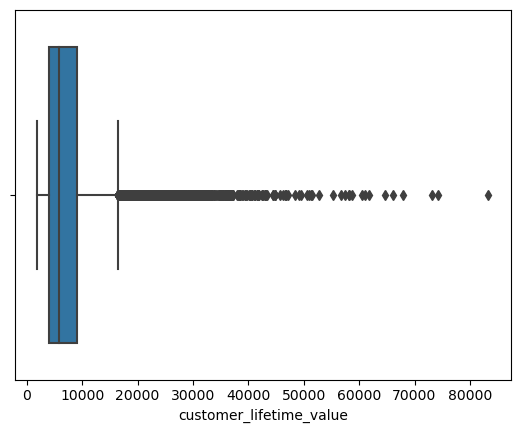

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


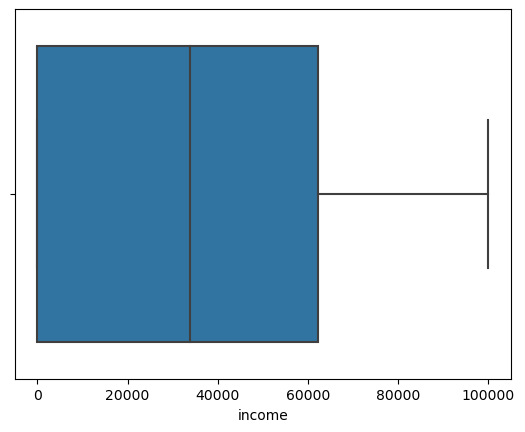

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


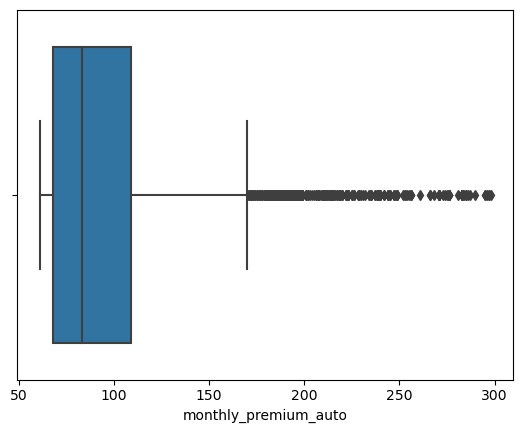

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


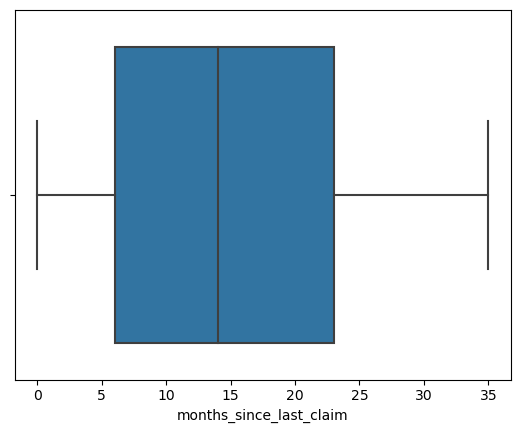

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


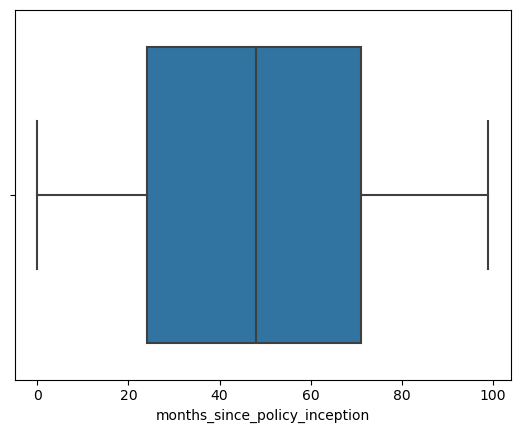

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


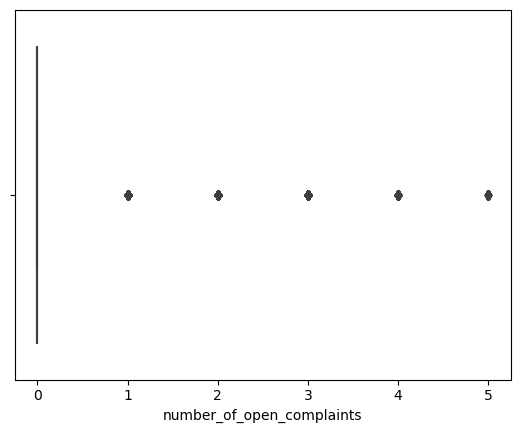

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


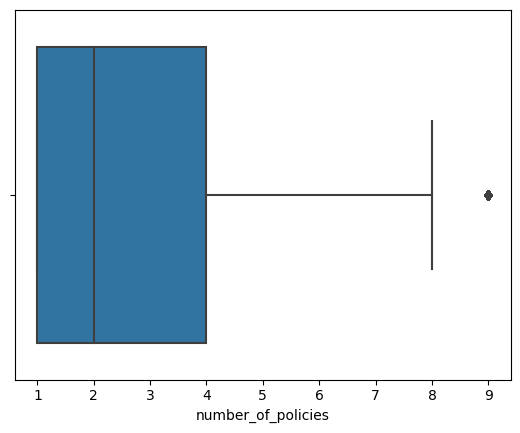

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


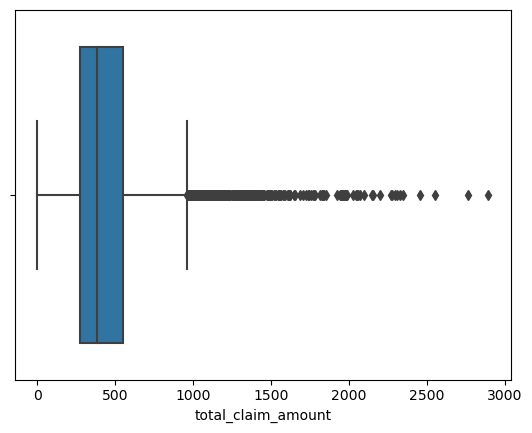

In [383]:
for column in num.columns:
    sns.boxplot(num[column],data=num)
    plt.show()

In [384]:
#2. Create a copy of the dataframe for the data wrangling.
data2 = data
data.to_csv('data.csv')

In [385]:
#3. Normalize the continuous variables. You can use any one method you want.

continuous_df = data.select_dtypes(include = float)

In [386]:
transformer = Normalizer().fit(continuous_df)
continuous_df_norm = transformer.transform(continuous_df)
pd.DataFrame(continuous_df_norm)

,0,1
0,0.990444,0.137916
1,0.987113,0.160023
2,0.999035,0.043913
3,0.997607,0.069137
4,0.998797,0.049033
...,...,...
9129,0.999964,0.008469
9130,0.992585,0.121552
9131,0.995341,0.096412
9132,0.995807,0.091475


In [387]:
#4. Encode the categorical variables
cat=cat.drop('customer',axis=1)


In [388]:
from sklearn.preprocessing import OneHotEncoder

In [389]:
#for col in cat.columns:
    #pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(cat[col])).transform(pd.DataFrame( cat[col])).toarray()) 
    

In [390]:
cat["coverage"] = cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [391]:
cat["employmentstatus"] = cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})

In [392]:
cat["location_code"] = cat["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [393]:
cat["vehicle_size"] = cat["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [394]:
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date,month_effective_to_date
0,Washington,No,0,Bachelor,0,F,0,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,0,2011-02-24,2011,2
1,Arizona,No,1,Bachelor,1,F,0,Single,Personal Auto,Personal L3,Agent,Four-Door Car,0,2011-01-31,2011,1
2,Nevada,No,2,Bachelor,0,F,0,Married,Personal Auto,Personal L3,Agent,Two-Door Car,0,2011-02-19,2011,2
3,California,No,0,Bachelor,1,M,0,Married,Corporate Auto,Corporate L2,Call Center,SUV,0,2011-01-20,2011,1
4,Washington,No,0,Bachelor,0,M,1,Single,Personal Auto,Personal L1,Agent,Four-Door Car,0,2011-02-03,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,Bachelor,0,M,2,Married,Personal Auto,Personal L1,Web,Four-Door Car,0,2011-02-10,2011,2
9130,California,Yes,1,College,0,F,0,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,0,2011-02-12,2011,2
9131,California,No,1,Bachelor,1,M,0,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,0,2011-02-06,2011,2
9132,California,No,1,College,0,M,0,Married,Personal Auto,Personal L2,Branch,Four-Door Car,2,2011-02-03,2011,2


In [395]:
cat = pd.concat([cat, pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(cat['state'])).transform(pd.DataFrame(cat['state'])).toarray())], axis=1)

In [396]:
cat['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [397]:
cat = pd.concat([cat, pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(cat['marital_status'])).transform(pd.DataFrame(cat['marital_status'])).toarray())], axis=1)

In [405]:
cat=cat.drop('policy',axis=1)

In [407]:
cat = pd.concat([cat, pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(cat['policy_type'])).transform(pd.DataFrame(cat['policy_type'])).toarray())], axis=1)

In [408]:
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,...,1,2,3,4,0,1,2,0,1,2
0,Washington,No,0,Bachelor,0,F,0,Married,Corporate Auto,Agent,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Arizona,No,1,Bachelor,1,F,0,Single,Personal Auto,Agent,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Nevada,No,2,Bachelor,0,F,0,Married,Personal Auto,Agent,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,California,No,0,Bachelor,1,M,0,Married,Corporate Auto,Call Center,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Washington,No,0,Bachelor,0,M,1,Single,Personal Auto,Agent,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,Bachelor,0,M,2,Married,Personal Auto,Web,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9130,California,Yes,1,College,0,F,0,Divorced,Corporate Auto,Branch,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9131,California,No,1,Bachelor,1,M,0,Single,Corporate Auto,Branch,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9132,California,No,1,College,0,M,0,Married,Personal Auto,Branch,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [411]:
cat.dtypes

state                       object
response                    object
coverage                     int64
education                   object
employmentstatus             int64
gender                      object
location_code                int64
marital_status              object
policy_type                 object
sales_channel               object
vehicle_class               object
vehicle_size                 int64
Effective To Date           object
year_effective_to_date       int64
month_effective_to_date      int64
0                          float64
1                          float64
2                          float64
3                          float64
4                          float64
0                          float64
1                          float64
2                          float64
0                          float64
1                          float64
2                          float64
dtype: object

In [398]:
#5. The time variable can be useful. Try to transform its data into a useful one. 
#Hint: Day week and month as integers might be useful.
cat.dtypes #done on the previous lab

dates = pd.concat([cat['year_effective_to_date'], cat['month_effective_to_date']], axis=1)
dates

,year_effective_to_date,month_effective_to_date
0,2011,2
1,2011,1
2,2011,2
3,2011,1
4,2011,2
...,...,...
9129,2011,2
9130,2011,2
9131,2011,2
9132,2011,2


In [409]:
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,...,1,2,3,4,0,1,2,0,1,2
0,Washington,No,0,Bachelor,0,F,0,Married,Corporate Auto,Agent,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Arizona,No,1,Bachelor,1,F,0,Single,Personal Auto,Agent,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Nevada,No,2,Bachelor,0,F,0,Married,Personal Auto,Agent,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,California,No,0,Bachelor,1,M,0,Married,Corporate Auto,Call Center,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Washington,No,0,Bachelor,0,M,1,Single,Personal Auto,Agent,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,Bachelor,0,M,2,Married,Personal Auto,Web,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9130,California,Yes,1,College,0,F,0,Divorced,Corporate Auto,Branch,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9131,California,No,1,Bachelor,1,M,0,Single,Corporate Auto,Branch,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9132,California,No,1,College,0,M,0,Married,Personal Auto,Branch,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [413]:
cat2 = cat._get_numeric_data()
cat2

,coverage,employmentstatus,location_code,vehicle_size,year_effective_to_date,month_effective_to_date,0,1,2,3,4,0,1,2,0,1,2
0,0,0,0,0,2011,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,0,0,2011,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,0,0,0,2011,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,1,0,0,2011,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,1,0,2011,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,2,0,2011,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9130,1,0,0,0,2011,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9131,1,1,0,0,2011,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9132,1,0,0,2,2011,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [417]:
datafinal = pd.concat([num, cat2,dates], axis=1)
datafinal.isna().sum()
datafinal.dropna(inplace=True)

In [418]:
datafinal

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,employmentstatus,...,3,4,0,1,2,0,1,2,year_effective_to_date,month_effective_to_date
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2011,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2011,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011,2
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2011,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011,2
9131,8163.890428,0,85,9,37,3,2,790.784983,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011,2


In [419]:
datafinal.to_csv('datafinal.csv')

In [ ]:
#6. Since the model will only accept numerical data, check and make sure that every column is numerical, 
#if some are not, change it using encoding. #Hint for Categorical Variables
#You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
# One hot to state - ok 
# Ordinal to coverage - ok 
# Ordinal to employmentstatus - ok 
# Ordinal to location code - ok
# One hot to marital status - ok
# One hot to policy type - ok
# One hot to policy - ok
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size - ok

#data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.